<a href="https://colab.research.google.com/github/owishiboo/Algos/blob/master/bio_c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

In [ ]:
from Bio.Seq import Seq

# BA1A - Compute the Number of Times a Pattern Appears in a Text

In [ ]:
text, patt = input().split()
seq = Seq(text)
print(seq.count_overlap(patt))

GCGCG GCG
2


# BA1B - Find the Most Frequent Words in a String

In [ ]:
text, k = input().split()
k = int(k)
seq = Seq(text)
dic={}
for i in range(len(text)-k+1):
  s1 = text[i:i+k]
  dic[s1] = seq.count_overlap(s1)
maxcnt = 0
for i in dic:
  maxcnt = max(dic[i], maxcnt)

for i in dic:
  if(dic[i]==maxcnt):
    print(i, end=" ")

ACGTTGCATGTCGCATGATGCATGAGAGCT 4
GCAT CATG 



# BA1C - Find the Reverse Complement of a String



In [ ]:
text = input()
seq = Seq(text)
print(seq.reverse_complement())

AAAACCCGGT
ACCGGGTTTT


#BA1D - Find All Occurrences of a Pattern in a String

In [ ]:
pattern, text = input().split()
k = len(pattern)
cnt = []
for i in range(len(text)-k+1):
  s1 = text[i:i+k]
  if(pattern==s1):
    cnt.append(i)
for i in cnt:
  print(i, end=" ")



ATAT GATATATGCATATACTT
1 3 9 

# BA1E - Find Patterns Forming Clumps in a String

In [ ]:
gnom, k , l , t = input().split()
k = int(k)
l = int(l)
t = int(t)
ans = set()
for i in range(len(gnom)-l+1):
  window = gnom[i:i+l]
  seq = Seq(gnom)
  for j in range(len(window)-k+1):
    patt = window[j:j+k]
    cnt = seq.count_overlap(patt)
    if(cnt>=t):
      ans.add(patt)
for i in ans:
  print(i, end=" ")

CGGACTCGACAGATGTGAAGAAATGTGAAGACTGAGTGAAGAGAAGAGGAAACACGACACGACATTGCGACATAATGTACGAATGTAATGTGCCTATGGC 5 75 4
CGACA GAAGA AATGT 

# BA1F - Find a Position in a Genome Minimizing the Skew

In [ ]:
gnom = input()
sum = 0
cnt = []
for i in gnom:
  cnt.append(sum)
  if(i=='C'):
    sum = sum - 1
  elif(i=='G'):
    sum = sum + 1
mincnt = 999999
for i in range(len(cnt)):
  if(cnt[i]<mincnt):
    mincnt = cnt[i]
for i in range(len(cnt)):
  if(cnt[i]==mincnt):
    print(i, end=' ')

CCTATCGGTGGATTAGCATGTCCCTGTACGTTTCGCCGCGAACTAGTTCACACGGCTTGATGGCAAATGGTTTTTCCGGCGACCGTAATCGTCCACCGAG
53 97 

# BA1G - Compute the Hamming Distance Between Two Strings

In [ ]:
t1, t2 = input().split()
cnt = 0
for i in range(len(t1)):
  if t1[i]!=t2[i]:
    cnt = cnt+1
print(cnt)

GGGCCGTTGGT GGACCGTTGAC
3


# BA1H - Find All Approximate Occurrences of a Pattern in a String

In [ ]:
patt, text, d = input().split()
d = int(d)
k = len(patt)
pos = []
for i in range(len(text)-k+1):
  patt1  = text[i:i+k]
  cnt = 0
  for j in range(len(patt)):
    if(patt[j]!=patt1[j]):
      cnt = cnt+1
  if(cnt<=d):
    pos.append(i)
for i in pos:
  print(i, end=" ")



ATTCTGGA CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAATGCCTAGCGGCTTGTGGTTTCTCCTACGCTCC 3
6 7 26 27 78 

# BA1I - Find the Most Frequent Words with Mismatches in a String

In [ ]:
def findAllPossibleKmers(k):
  kmers = "ATGC"
  ans = ['']
  for _ in range(k):
    newAns = []
    if ans==[]:
      ans == newAns
    for i in kmers:
      for kmer in ans:
        newAns.append(kmer+i)
    ans = newAns
  return ans


In [ ]:
text, k, d = input().split()
k= int(k)
d = int(d)
kmers = findAllPossibleKmers(k)
dic = {}
for kmer in kmers:
  cnt = 0
  for i in range(len(text)-k+1):
    mis = 0
    patt = text[i:i+k]
    for nu in range(len(kmer)):
      if(kmer[nu]!=patt[nu]):
        mis = mis+1
    if(mis<=d):
      cnt = cnt + 1
  dic[kmer] = cnt
maxcnt = 0
for i in dic:
  maxcnt = max(dic[i], maxcnt)
for i in dic:
  if(dic[i]==maxcnt):
    print(i, end=" ")

ACGTTGCATGTCGCATGATGCATGAGAGCT 4 1
ATGT GATG ATGC 

# BA1J - Find Frequent Words with Mismatches and Reverse Complements

In [ ]:
def findAllPossibleKmers(k):
  ans = ['']
  kmers = "ATGC"
  for _ in range(k):
    newAns = []
    if ans == []:
      ans = newAns
    for i in kmers:
      for kmer in ans:
        newAns.append(kmer+i)
    ans = newAns
  return ans

In [ ]:
text, k, d = input().split()
k = int(k)
d = int(d)
kmers = findAllPossibleKmers(k)
dic = {}
for kmer in kmers:
  kmerev = Seq(kmer).reverse_complement()
  cnt=0
  for i in range(len(text)-k+1):
    s1 = text[i:i+k]
    mis1 = 0
    for j in range(len(s1)):
      if s1[j] != kmer[j]:
        mis1 = mis1+1
    if mis1<=d:
      cnt = cnt + 1

    mis2 = 0
    for j in range(len(s1)):
      if s1[j] != kmerev[j]:
        mis2 = mis2+1
    if mis2<=d:
      cnt = cnt + 1

  dic[kmer] = cnt
maxcnt = 0
for i in dic:
  maxcnt = max(dic[i], maxcnt)
for i in dic:
  if(dic[i]==maxcnt):
    print(i, end=" ")



ATGATCACGACAAGCGATGATCACATGATCACATGATCACGCATTGCGTATACGGCATTGCGTGGCATGGACAAGCGGTATACGGTGGCATGGTGGCATGGTGGCATGATGATCACGCATTGCGCATTGCGACAAGCGGACAAGCGATGATCACGTGGCATGGTGGCATGGCATTGCGTGGCATGGTATACGGACAAGCGGTGGCATGGTGGCATGGACAAGCGGACAAGCGGTGGCATGATGATCACGCATTGCGACAAGCGGACAAGCGATGATCACGTATACGGTATACGGTATACGGCATTGCGACAAGCGATGATCACGACAAGCGGTATACGATGATCACATGATCACGTGGCATGGCATTGCGTATACGGTATACGGTATACGATGATCACGTGGCATGATGATCACGTATACGATGATCACATGATCACATGATCACGACAAGCGGACAAGCGGACAAGCGGTGGCATGGACAAGCGGTATACGGCATTGCGACAAGCGGCATTGCGTATACGATGATCACGTATACGGCATTGCGCATTGCGCATTGCGTGGCATGGTGGCATGGTATACGGTGGCATGATGATCACGCATTGCGACAAGCGGCATTGCATGATCACGTATACGGCATTGCGCATTGCGTGGCATGATGATCACGCATTGCGCATTGCGACAAGCGGTATACGATGATCACATGATCACGACAAGCGGTATACGGACAAGCGGTATACGGTGGCATGGACAAGCGATGATCACGCATTGCGTGGCATGGCATTGCATGATCACGCATTGCGACAAGCGGTATACGGTATACGGACAAGCGGTATACGATGATCACGTATACG 5 3
GTCCT AGGAC 

# BA1K - Generate the Frequency Array of a String

In [ ]:
def findAllPossibleKmer(k):
  kmer = "ATGC"
  ans = ['']
  for _ in range(k):
    newAns = []
    if ans == []:
      ans = newAns
    for i in kmer:
      for kmr in ans:
        newAns.append(kmr+i)
    ans = newAns
  return ans


In [ ]:
text, k = input().split()
k = int(k)
kmers = findAllPossibleKmer(k)
kmers = sorted(kmers)
cnt = []
seq = Seq(text)
for kmer in kmers:
  cnt.append(seq.count_overlap(kmer))
for i in cnt:
  print(i, end=" ")


TAGTAGGCCACCATAAACCATCAGTATAGCTTGGCTGAGGTGCAAATTTGAACGGTGACTACTCAGACTGGTGCAAGTTGATTCGTTCGCAGACTGCTCGGAGCCGCCGAGGGTGCATAGGTTAGGTTGCCTTGAACACGACGACTTACTCCCTTCGTGAATAGGGCGGCATGACTTTCGATCGAAGAAACTGGAACGCAACTTACGCAGCGAACCGCACGTGTTCTAAACATGTTCATCCGTGTGCTGTCACTGGTCGGTGGATGTCTGTAGCATGGACTCAGACCTACTTAGCCTTTTAGCACGATAGTAGGCCCAAGGGCACCCTGGCCCATAGGCTTTGTGACCCATCTAGATATCAATCACGCAAACTAGTAAGATCTGCTTGGAGGCAGGTAATGAACCTACTGCGCGTCGGGTTCTTCACTACATTATACGAGTAGATTGCGACGCTATACAGATGCTGACACAACTGAGCAGGAGGTTCCGTGGAGTGGGAGACGGCTTGCCGTAAAAAGCGTTCTTTAGGCCACAAGCATCCACGGACCTAGGAACATCATAACGGACATAATTGATACCTTCTATCAACACGCGGATTGTTCGCGACTAGTTATTATATCCGCGCACCTCGGTGTCCGTACGCCCCTTCGCCCGATGTCAATTATATCGAGTAAAAGGCAAATTAGATATCAGAATCACAACGAGTTGACAATTCACCCCGTAAAGACAGATCACCATACAATACTC 8
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# BA1L - Implement PatternToNumber



In [ ]:
nucle = "ACGT"
text = input()
text = text[::-1]
total = 0
for i in range(len(text)):
  total =  total + (nucle.find(text[i]))*pow(4,i)
print(total)

ATGGGTACGACGCTCGTCAAA
1008345930560


In [3]:
import itertools
s = "ATGC"
k = 2
k_mers = [''.join(p) for p in itertools.product(s, repeat=k)]
print(k_mers)

['AA', 'AT', 'AG', 'AC', 'TA', 'TT', 'TG', 'TC', 'GA', 'GT', 'GG', 'GC', 'CA', 'CT', 'CG', 'CC']


# BA1M - Implement NumberToPattern

In [20]:
n,k = input().split()
n = int(n)
k = int(k)
s = "ACGT"
text = ""
while(k>0):
  text = text + s[(n%4)]
  n = n//4
  k = k-1
text = text[::-1]
print(text)


6081 9
AACCTTAAC


# BA1N - Generate the d-Neighborhood of a String

In [31]:
import itertools
s = "ATGC"
pattern, d = input().split()
d = int(d)
k = len(pattern)
kmers = [''.join(p) for p in itertools.product(s, repeat=k)]
ans = []
for kmer in kmers:
  cnt = 0
  for i in range(len(pattern)):
    if(kmer[i]!=pattern[i]):
      cnt = cnt + 1
  if cnt<=d:
    ans.append(kmer)
for i in ans:
  print(i)

TGCCCAATTGAA 2
AACCCAATTGAA
ATCCCAATTGAA
AGACCAATTGAA
AGTCCAATTGAA
AGGCCAATTGAA
AGCACAATTGAA
AGCTCAATTGAA
AGCGCAATTGAA
AGCCAAATTGAA
AGCCTAATTGAA
AGCCGAATTGAA
AGCCCAAATGAA
AGCCCAATAGAA
AGCCCAATTAAA
AGCCCAATTTAA
AGCCCAATTGAA
AGCCCAATTGAT
AGCCCAATTGAG
AGCCCAATTGAC
AGCCCAATTGTA
AGCCCAATTGGA
AGCCCAATTGCA
AGCCCAATTCAA
AGCCCAATGGAA
AGCCCAATCGAA
AGCCCAAGTGAA
AGCCCAACTGAA
AGCCCATTTGAA
AGCCCAGTTGAA
AGCCCACTTGAA
AGCCCTATTGAA
AGCCCGATTGAA
AGCCCCATTGAA
ACCCCAATTGAA
TAACCAATTGAA
TATCCAATTGAA
TAGCCAATTGAA
TACACAATTGAA
TACTCAATTGAA
TACGCAATTGAA
TACCAAATTGAA
TACCTAATTGAA
TACCGAATTGAA
TACCCAAATGAA
TACCCAATAGAA
TACCCAATTAAA
TACCCAATTTAA
TACCCAATTGAA
TACCCAATTGAT
TACCCAATTGAG
TACCCAATTGAC
TACCCAATTGTA
TACCCAATTGGA
TACCCAATTGCA
TACCCAATTCAA
TACCCAATGGAA
TACCCAATCGAA
TACCCAAGTGAA
TACCCAACTGAA
TACCCATTTGAA
TACCCAGTTGAA
TACCCACTTGAA
TACCCTATTGAA
TACCCGATTGAA
TACCCCATTGAA
TTACCAATTGAA
TTTCCAATTGAA
TTGCCAATTGAA
TTCACAATTGAA
TTCTCAATTGAA
TTCGCAATTGAA
TTCCAAATTGAA
TTCCTAATTGAA
TTCCGAATTGAA
TTCCCAAATGAA
TTCCCAATAG

# Seq Related

In [1]:
!pip install biopython
from Bio.Seq import Seq
from Bio.SeqUtils import GC, gc_fraction, molecular_weight

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.0 MB/s eta 0:00:00


In [3]:
seq = Seq("AAATTTGGGCCCATGCTTGG")
print(seq.complement(), seq.reverse_complement(),seq.transcribe(), seq.transcribe().back_transcribe(), seq.translate(), seq.count('A'),seq.count('AA'), seq.count_overlap("AA"), GC(seq), gc_fraction(seq), molecular_weight(seq))

TTTAAACCCGGGTACGAACC CCAAGCATGGGCCCAAATTT AAAUUUGGGCCCAUGCUUGG AAATTTGGGCCCATGCTTGG KFGPML 4 1 2 50.0 0.5 6227.963099999999


/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


# Use gb and fasta

In [4]:
from Bio import SeqIO

In [11]:
file = SeqIO.read("TestSeq1.fasta","fasta")
print(file.count("A"),file.id, sep="\n")

784
NM_001126.2


In [8]:
file = SeqIO.parse("MultiSeq.fasta", "fasta")
for seq in file:
  print(seq.count("A"))

784
394


In [43]:
file = SeqIO.read("TestSeq2.gb","gb")
cnt = 0
sum = []
ind = []
index = 0
for i in file:

  ind.append(index)
  index = index+1
  sum.append(cnt)
  if(i=="C"):
    cnt = cnt - 1
  elif(i=="G"):
    cnt = cnt + 1
print(sum)

[0, 1, 2, 2, 2, 3, 4, 5, 6, 5, 6, 6, 7, 8, 7, 6, 6, 5, 6, 7, 7, 6, 5, 6, 7, 8, 9, 9, 10, 11, 10, 11, 12, 11, 10, 11, 11, 11, 12, 11, 10, 11, 10, 9, 9, 8, 7, 7, 8, 9, 10, 9, 8, 8, 7, 7, 7, 6, 5, 5, 6, 5, 6, 7, 8, 7, 8, 9, 9, 10, 9, 9, 10, 9, 8, 9, 9, 10, 11, 10, 9, 10, 11, 10, 9, 9, 10, 9, 10, 9, 10, 11, 12, 13, 12, 12, 13, 13, 12, 12, 12, 13, 14, 14, 14, 13, 12, 11, 10, 9, 9, 9, 10, 10, 11, 10, 11, 12, 13, 12, 12, 13, 13, 14, 15, 14, 15, 16, 16, 17, 17, 18, 17, 18, 19, 20, 21, 20, 21, 22, 23, 24, 24, 23, 23, 24, 25, 24, 24, 25, 26, 26, 27, 28, 29, 29, 30, 31, 30, 31, 32, 31, 30, 29, 30, 31, 30, 31, 32, 33, 34, 33, 34, 35, 36, 37, 38, 37, 38, 39, 40, 41, 40, 39, 40, 41, 40, 39, 39, 38, 38, 39, 40, 39, 39, 38, 37, 37, 37, 36, 36, 36, 35, 34, 34, 33, 33, 34, 33, 33, 33, 34, 34, 35, 36, 35, 35, 36, 37, 36, 37, 38, 37, 36, 37, 36, 36, 37, 37, 38, 37, 37, 38, 38, 38, 37, 37, 38, 38, 38, 37, 38, 37, 37, 36, 36, 35, 35, 34, 33, 33, 32, 33, 32, 31, 32, 33, 32, 31, 32, 31, 30, 30, 29, 29, 28, 27

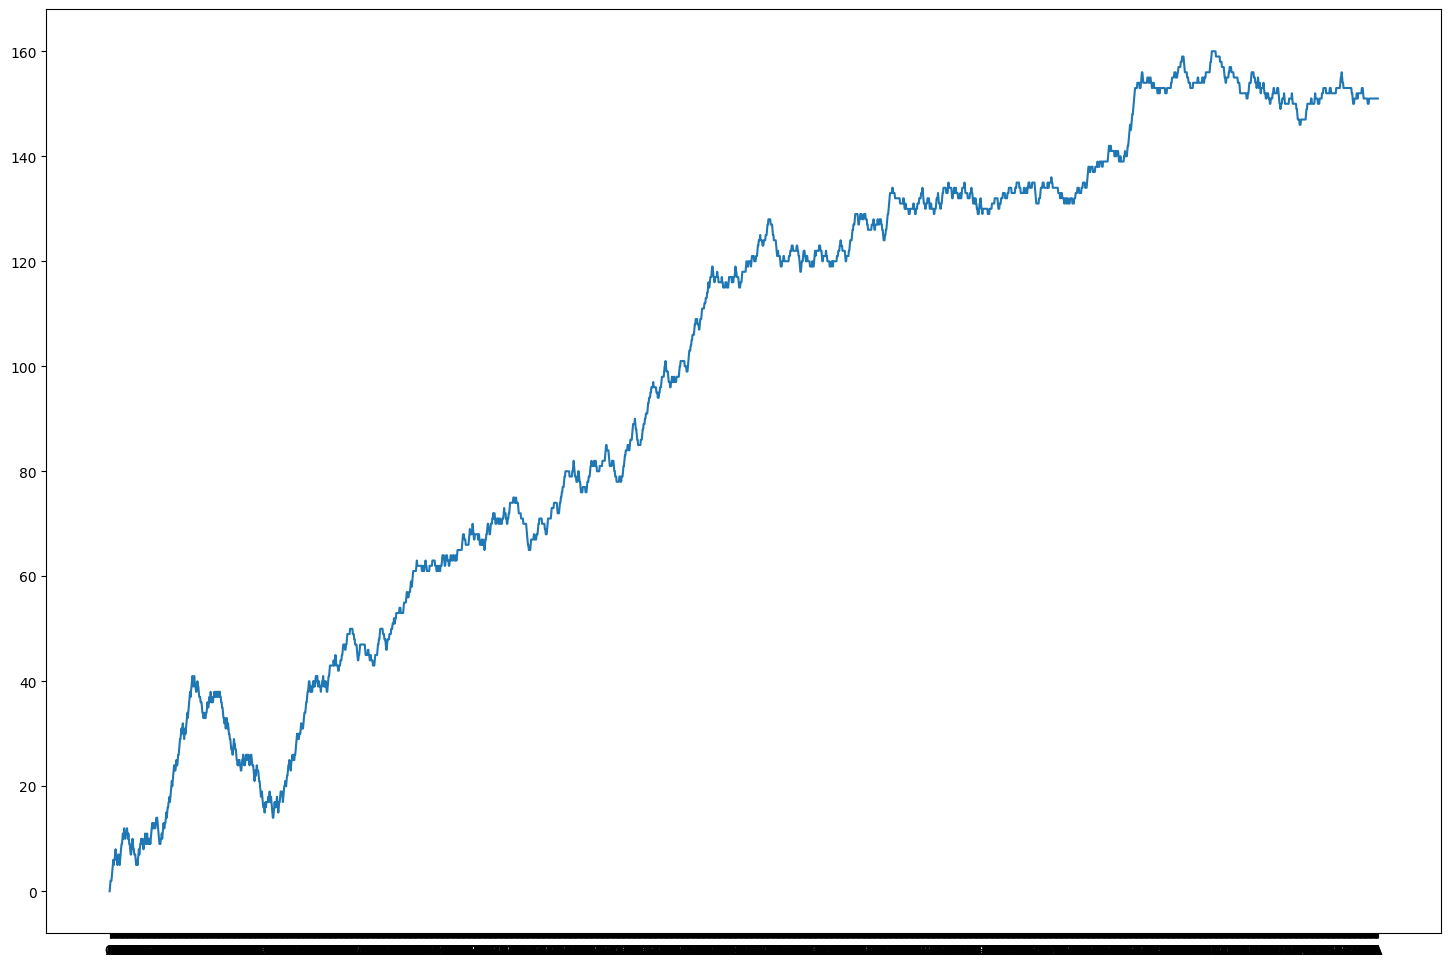

In [46]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,12))
plt.plot(ind, sum)
plt.xticks(ind, file)
plt.show()

<BarContainer object of 4 artists>

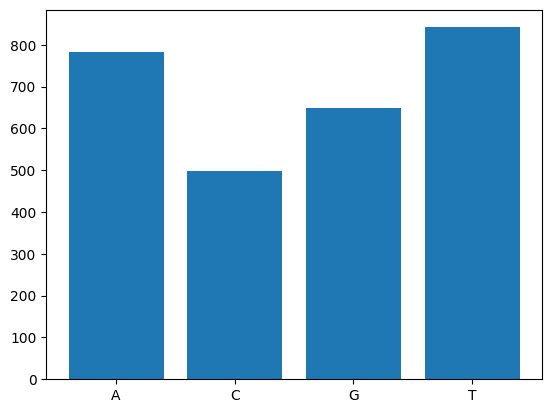

In [37]:
dic = {"A":file.count("A"), "C":file.count("C"), "G":file.count("G"), "T":file.count("T")}
plt.bar(dic.keys(), dic.values())